**Data Set Decription:**

* Age
* Gender
* Daily Steps
* Resting Heart Rate
* Active Heart Rate
* Hours of Sleep
* Daily Calorie Intake
* Stress Level (0-10 scale)
* Sleep Quality (0-100 score)
* Daily Activity Type (categorical: sedentary, moderate, intense)
* Mood (multiclass: sad, neutral, happy)

In [4]:
# Reset float display format to default
# pd.reset_option('display.float_format')

# Load the data
import pandas as pd
df =pd.read_csv('smart_health_tracker_data.csv')
print(df.head(5))


    Age  Gender  Daily_Steps  Resting_Heart_Rate  Active_Heart_Rate  \
0  40.0     NaN      13116.0                61.0              136.0   
1  33.0  Female       1138.0                57.0              112.0   
2  42.0    Male      10742.0                62.0              140.0   
3  53.0    Male      12092.0                65.0              128.0   
4  32.0  Female      12519.0                56.0              105.0   

   Hours_of_Sleep  Daily_Calorie_Intake  Stress_Level  Sleep_Quality  \
0             9.7                4000.0           3.0           80.0   
1             4.9                1677.0           9.0           54.0   
2             5.5                4000.0           8.0           60.0   
3             6.5                4000.0           2.0           94.0   
4             6.5                4000.0           9.0           57.0   

  Daily_Activity_Type     Mood  
0             Intense      Sad  
1           Sedentary  Neutral  
2           Sedentary  Neutral  
3       

In [5]:
import pandas as pd

# Calculate percentage of missing values per column
missing_percent = df.isnull().mean()*100

# Display
print(missing_percent.sort_values())


Age                     1.0
Gender                  1.0
Daily_Steps             1.0
Resting_Heart_Rate      1.0
Active_Heart_Rate       1.0
Hours_of_Sleep          1.0
Daily_Calorie_Intake    1.0
Stress_Level            1.0
Sleep_Quality           1.0
Daily_Activity_Type     1.0
Mood                    1.0
dtype: float64


In [6]:
# Fill the missing values

# Fill numerical features
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Daily_Steps'] = df['Daily_Steps'].fillna(df['Daily_Steps'].mean())
df['Resting_Heart_Rate'] = df['Resting_Heart_Rate'].fillna(df['Resting_Heart_Rate'].mean())
df['Active_Heart_Rate'] = df['Active_Heart_Rate'].fillna(df['Active_Heart_Rate'].mean())
df['Hours_of_Sleep'] = df['Hours_of_Sleep'].fillna(df['Hours_of_Sleep'].mean())
df['Daily_Calorie_Intake'] = df['Daily_Calorie_Intake'].fillna(df['Daily_Calorie_Intake'].mean())
df['Sleep_Quality'] = df['Sleep_Quality'].fillna(df['Sleep_Quality'].mean())

# Fill ordinal/categorical features with mode
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
df['Stress_Level'] = df['Stress_Level'].fillna(df['Stress_Level'].mode()[0])
df['Daily_Activity_Type'] = df['Daily_Activity_Type'].fillna(df['Daily_Activity_Type'].mode()[0])
df['Mood'] = df['Mood'].fillna(df['Mood'].mode()[0])


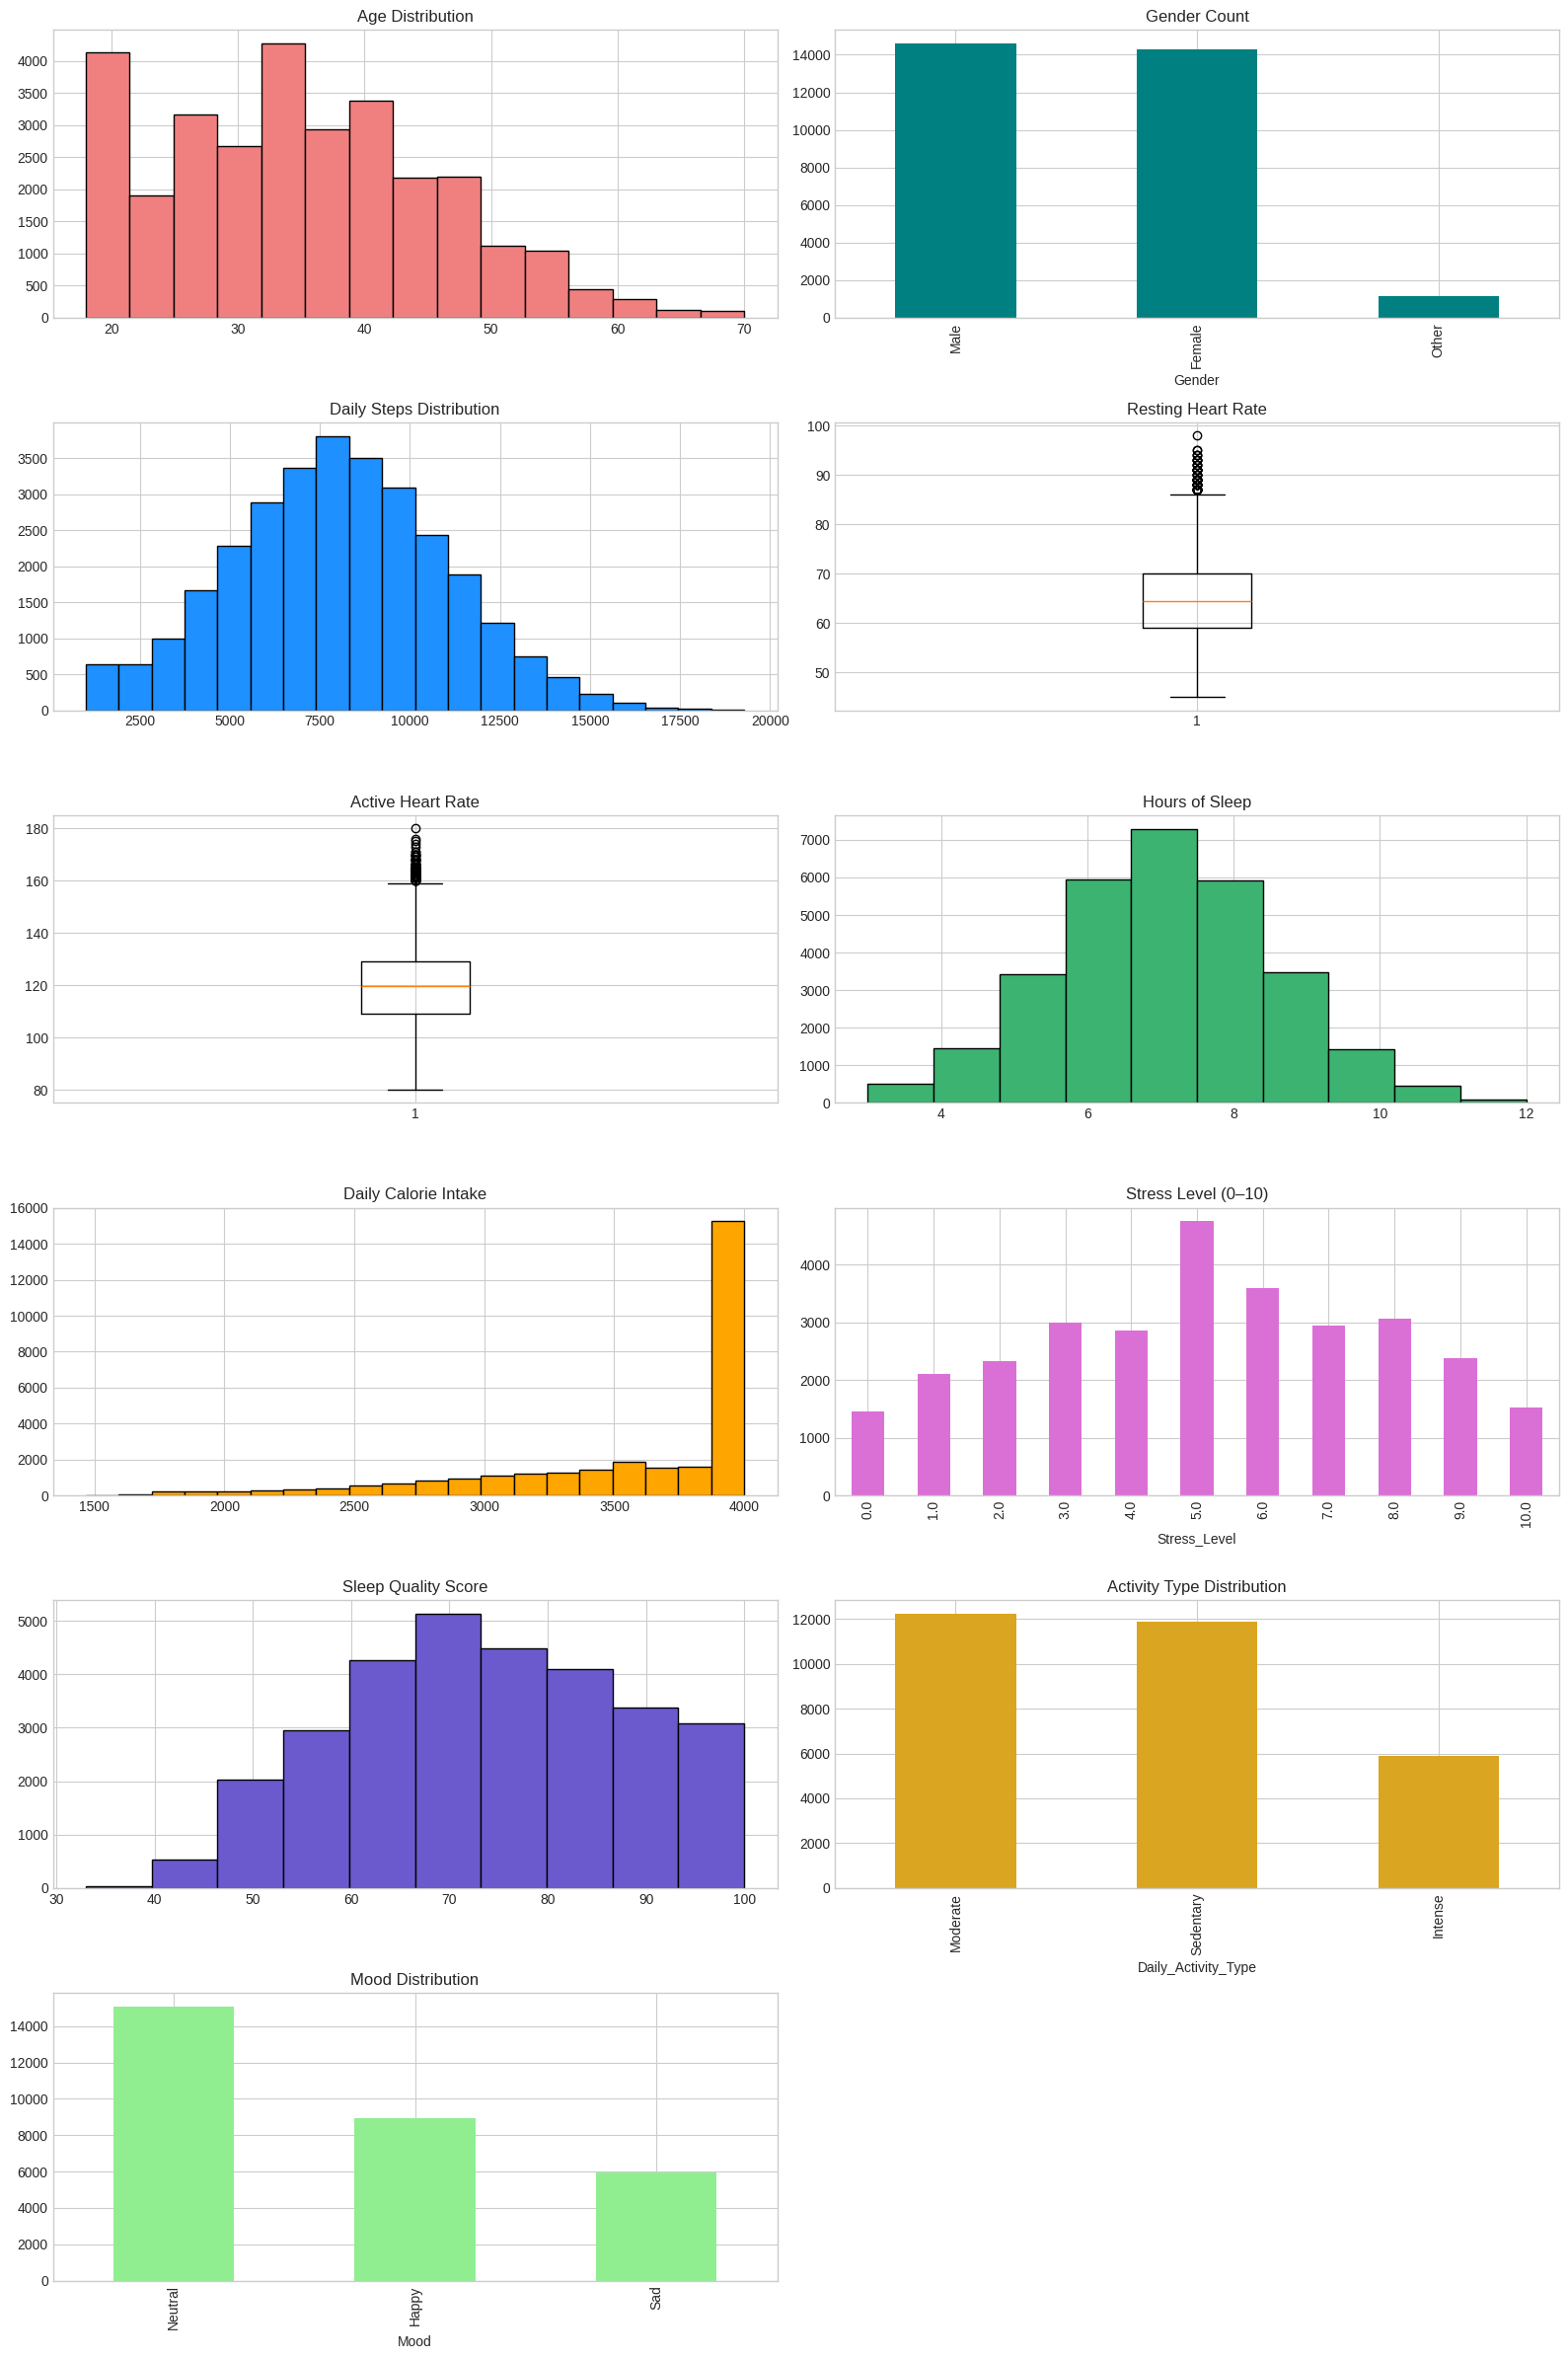

In [7]:
# Visualize the tracker data
import matplotlib.pyplot as plt

# Set plot style
plt.style.use('seaborn-v0_8-whitegrid')

# Create figure and axes
fig, axes = plt.subplots(nrows=6, ncols=2, figsize=(16, 24))
axes = axes.flatten()

# Plot 1 - Age (histogram)
axes[0].hist(df['Age'], bins=15, color='lightcoral', edgecolor='black')
axes[0].set_title('Age Distribution')

# Plot 2 - Gender (bar plot)
df['Gender'].value_counts().plot(kind='bar', ax=axes[1], color='teal')
axes[1].set_title('Gender Count')

# Plot 3 - Daily Steps (histogram)
axes[2].hist(df['Daily_Steps'], bins=20, color='dodgerblue', edgecolor='black')
axes[2].set_title('Daily Steps Distribution')

# Plot 4 - Resting Heart Rate (boxplot)
axes[3].boxplot(df['Resting_Heart_Rate'])
axes[3].set_title('Resting Heart Rate')

# Plot 5 - Active Heart Rate (boxplot)
axes[4].boxplot(df['Active_Heart_Rate'])
axes[4].set_title('Active Heart Rate')

# Plot 6 - Hours of Sleep (histogram)
axes[5].hist(df['Hours_of_Sleep'], bins=10, color='mediumseagreen', edgecolor='black')
axes[5].set_title('Hours of Sleep')

# Plot 7 - Calorie Intake (histogram)
axes[6].hist(df['Daily_Calorie_Intake'], bins=20, color='orange', edgecolor='black')
axes[6].set_title('Daily Calorie Intake')

# Plot 8 - Stress Level (bar plot)
df['Stress_Level'].value_counts().sort_index().plot(kind='bar', ax=axes[7], color='orchid')
axes[7].set_title('Stress Level (0–10)')

# Plot 9 - Sleep Quality (histogram)
axes[8].hist(df['Sleep_Quality'], bins=10, color='slateblue', edgecolor='black')
axes[8].set_title('Sleep Quality Score')

# Plot 10 - Activity Type (bar plot)
df['Daily_Activity_Type'].value_counts().plot(kind='bar', ax=axes[9], color='goldenrod')
axes[9].set_title('Activity Type Distribution')

# Plot 11 - Mood (bar plot)
df['Mood'].value_counts().plot(kind='bar', ax=axes[10], color='lightgreen')
axes[10].set_title('Mood Distribution')

# Remove last unused subplot
fig.delaxes(axes[11])

# Adjust layout
plt.tight_layout()
plt.show()

In [8]:
import statsmodels.api as sm

data = df[['Daily_Steps', 'Stress_Level', 'Hours_of_Sleep']]

# Define independent variables (X) and dependent variable (y)
X = data[['Daily_Steps', 'Stress_Level']]
y = data['Hours_of_Sleep']

# Add constant to X (for intercept)
X = sm.add_constant(X)

# Fit the model
model = sm.OLS(y, X).fit()

# Print summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:         Hours_of_Sleep   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.2475
Date:                Tue, 24 Jun 2025   Prob (F-statistic):              0.781
Time:                        15:39:27   Log-Likelihood:                -54358.
No. Observations:               30000   AIC:                         1.087e+05
Df Residuals:                   29997   BIC:                         1.087e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            7.0187      0.029    238.233   

R² Score: 1.650093842742173e-05


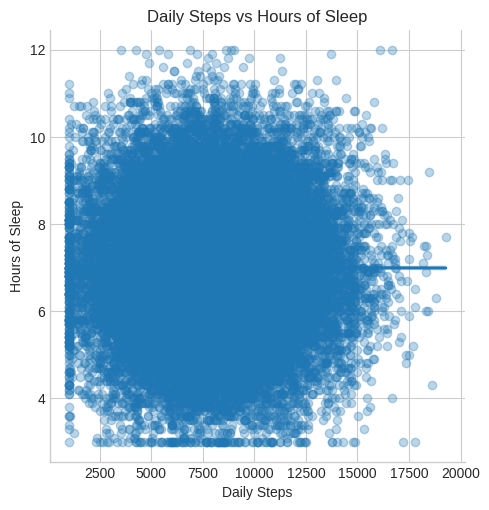

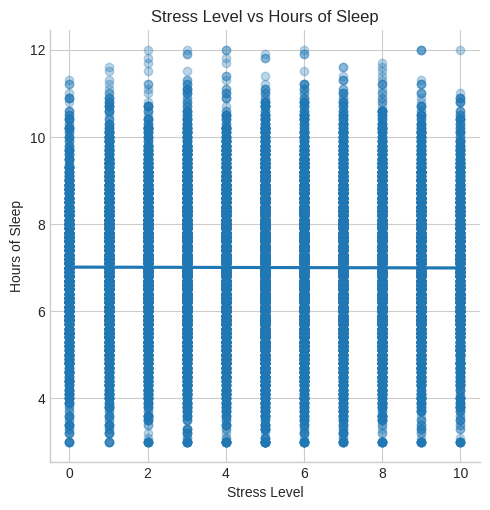

In [9]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

# Define features and target
X = df[['Daily_Steps', 'Stress_Level']]
y = df['Hours_of_Sleep']

# Fit the model
model = LinearRegression()
model.fit(X, y)


# Predict
y_pred = model.predict(X)
print("R² Score:", r2_score(y,y_pred))

# Plot 1: Daily Steps vs Hours of Sleep
sns.lmplot(x='Daily_Steps', y='Hours_of_Sleep', data=df, scatter_kws={'alpha': 0.3})
plt.title('Daily Steps vs Hours of Sleep')
plt.xlabel('Daily Steps')
plt.ylabel('Hours of Sleep')
plt.show()

# Plot 2: Stress Level vs Hours of Sleep
sns.lmplot(x='Stress_Level', y='Hours_of_Sleep', data=df, scatter_kws={'alpha': 0.3})
plt.title('Stress Level vs Hours of Sleep')
plt.xlabel('Stress Level')
plt.ylabel('Hours of Sleep')
plt.show()


In [10]:
# Get all the correlation with sleep
import pandas as pd

# Correlation with sleep
correlations = df.corr(numeric_only=True)['Stress_Level'].sort_values(ascending=False)



**Hypothesis Testing**

Target (y): Sleep_Quality
Feature (x): Stress_Level

**Hypotheses:**

H₀ (Null Hypothesis): There is no significant linear relationship between stress level and sleep quality

H₁ (Alternative Hypothesis): There is a significant linear relationship between stress level and sleep quality


In [11]:
import statsmodels.api as sm
import pandas as pd

# Define X and y
X = df[['Daily_Steps', 'Stress_Level']]
y = df['Hours_of_Sleep']

# Add constant (intercept term)
X = sm.add_constant(X)

# Fit OLS model
model = sm.OLS(y, X).fit()

# Print summary for hypothesis test
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:         Hours_of_Sleep   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.2475
Date:                Tue, 24 Jun 2025   Prob (F-statistic):              0.781
Time:                        15:39:36   Log-Likelihood:                -54358.
No. Observations:               30000   AIC:                         1.087e+05
Df Residuals:                   29997   BIC:                         1.087e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            7.0187      0.029    238.233   

Intercept: 98.77074211999255
Coefficient (Stress Level): -4.885263898452569
R² Score: 0.8676523263333935
MSE: 27.22915427708266


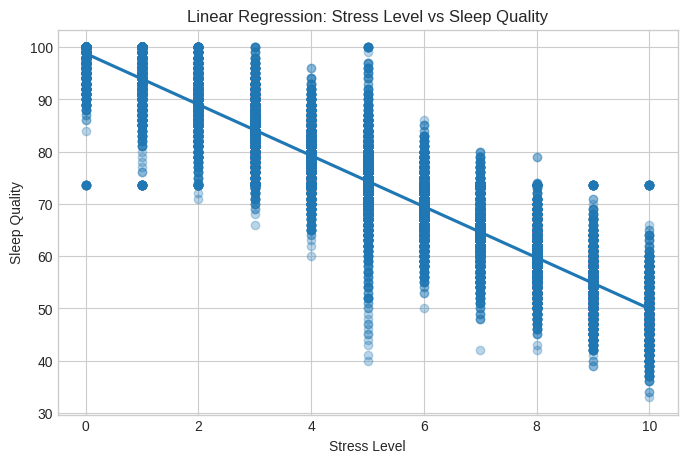

In [12]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare data
X = df[['Stress_Level']]
y = df['Sleep_Quality']

# Fit model
model = LinearRegression()
model.fit(X, y)

# Predict
y_pred = model.predict(X)

# Print regression info
print("Intercept:", model.intercept_)
print("Coefficient (Stress Level):", model.coef_[0])
print("R² Score:", r2_score(y, y_pred))
print("MSE:", mean_squared_error(y, y_pred))

# Plot regression line
plt.figure(figsize=(8,5))
sns.regplot(x='Stress_Level', y='Sleep_Quality', data=df, scatter_kws={'alpha':0.3})
plt.title('Linear Regression: Stress Level vs Sleep Quality')
plt.xlabel('Stress Level')
plt.ylabel('Sleep Quality')
plt.grid(True)
plt.show()


In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler

# Binary target: Well Rested
df['Well_Rested'] = (df['Hours_of_Sleep'] >= 7).astype(int)

# Features and target
X = df[['Sleep_Quality', 'Stress_Level', 'Daily_Steps', 'Daily_Calorie_Intake']]
y = df['Well_Rested']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Fit a Regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

# Results
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00      2933
           1       0.51      1.00      0.68      3067

    accuracy                           0.51      6000
   macro avg       0.26      0.50      0.34      6000
weighted avg       0.26      0.51      0.35      6000



In [15]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Binary target: Well Rested
df['Well_Rested'] = (df['Hours_of_Sleep'] >= 7).astype(int)

# Features and target
X = df[['Sleep_Quality', 'Stress_Level', 'Daily_Steps', 'Daily_Calorie_Intake']]
y = df['Well_Rested']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# SVM Classifier with RBF kernel
svm = SVC(kernel='rbf', class_weight='balanced')
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)

# Evaluation
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.49      0.41      0.45      2933
           1       0.51      0.60      0.55      3067

    accuracy                           0.51      6000
   macro avg       0.50      0.50      0.50      6000
weighted avg       0.50      0.51      0.50      6000



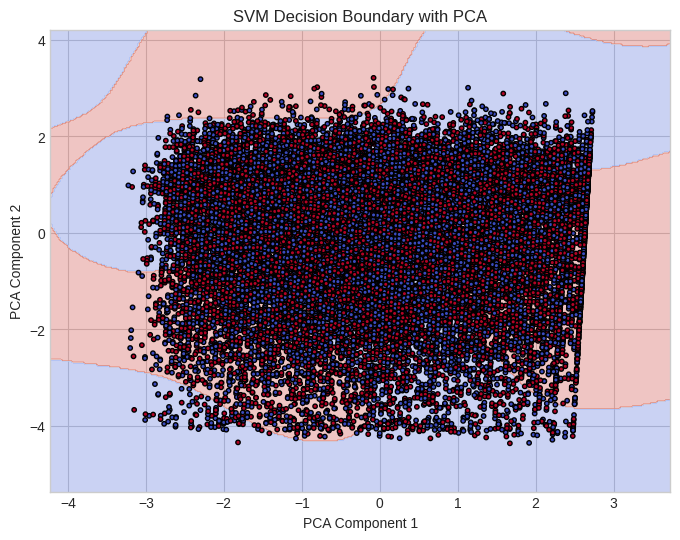

In [17]:
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

# Prepare data
X = df[['Sleep_Quality', 'Stress_Level', 'Daily_Steps', 'Daily_Calorie_Intake']]
y = (df['Hours_of_Sleep'] >= 7).astype(int)  # Binary target

# Scale and reduce to 2D
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Train SVM
svm = SVC(kernel='rbf', class_weight='balanced')
svm.fit(X_train, y_train)

# Create meshgrid for decision surface
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                     np.linspace(y_min, y_max, 300))

Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.3)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap=plt.cm.coolwarm, s=10, edgecolors='k')
plt.title("SVM Decision Boundary with PCA")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.grid(True)
plt.show()


In [18]:
# What do we learn from this?
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Encode the target
le = LabelEncoder()
df['Activity_encoded'] = le.fit_transform(df['Daily_Activity_Type'])  # sedentary=0, moderate=1, intense=2

# Features that influence activity clearly
X = df[['Daily_Steps', 'Active_Heart_Rate', 'Daily_Calorie_Intake']]
y = df['Activity_encoded']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train SVM
svm = SVC(kernel='rbf', class_weight='balanced')
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)

# Results
print(classification_report(y_test, y_pred, target_names=le.classes_))


              precision    recall  f1-score   support

     Intense       0.20      0.29      0.24      1200
    Moderate       0.41      0.44      0.42      2393
   Sedentary       0.40      0.28      0.33      2407

    accuracy                           0.35      6000
   macro avg       0.34      0.34      0.33      6000
weighted avg       0.36      0.35      0.35      6000

